## PyCaret 설치

In [ ]:
# pip install --pre pycaret
!pip install -U pycaret -q

Google Colab 사용자의 경우 다음의 코드를 실행합니다.

In [ ]:
from pycaret.utils import enable_colab

enable_colab()

## 분류 Classification

- 분류 모델은 정답 값(label)에 대하여 **클래스(class)**가 존재하면 개별 데이터를 특정 클래스로 분류할 수 있는 모델입니다.

- (예시) 암/정상 환자 분류, 스팸/햄 메일 분류

## 필요한 모듈 import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_columns = None

## 실습을 위한 데이터셋 로드

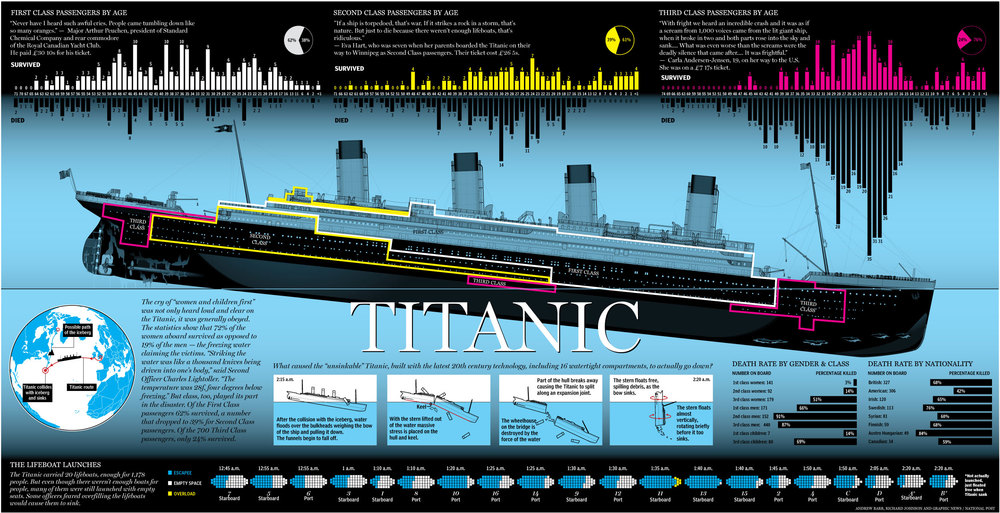

In [3]:
from IPython.display import Image

Image('https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg')

건조 당시 세계 최대의 여객선이었지만,**1912년의 최초이자 최후의 항해 때 빙산과 충돌해 침몰한 비운의 여객선**. 아마도 세상에서 가장 유명한 여객선이자 침몰선일 것입니다. 

침몰한 지 100년이 넘었지만 아직까지 세계에서 가장 유명한 침몰선입니다. 

사망자 수는 1위는 아니지만, 세계적으로 유명한 영화의 영향도 있고, 당시 최첨단 기술에 대해 기대감이 컸던 사회에 큰 영향을 끼치기도 한데다가, 근대 사회에서 들어서자마자 얼마 안된, 그리고 **유명인사들이 여럿 희생된 대참사**이기 때문에 가장 유명한 침몰선이 되었습니다. 또한 이 사건을 기점으로 여러가지 안전 조약들이 생겨났으니 더더욱 그렇습니다.

In [23]:
dataset = sns.load_dataset('titanic')
dataset.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [24]:
# 데이터셋 크기 출력
dataset.shape

(891, 15)

### 컬럼 설명

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성인남자(man), 성인여자(woman), 어린아이(child)
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## 셋업 setup()

- [도큐먼트 링크](https://pycaret.readthedocs.io/en/latest/api/classification.html)

분류 예측 모형(Classification Model)을 생성하기 위한 첫 단계로 다음을 import 합니다.

In [25]:
from pycaret.classification import *  # 분류

**`setup` 함수**

- `data`: 학습할 데이터셋을 지정합니다.
- `target`: 분류 예측할 대상(target) 컬럼을 지정합니다.
- `session_id`: SEED 값을 지정합니다.

`setup()` 함수 실행시 AutoML / 데이터 전처리시 적용할 다양한 옵션 값들을 출력합니다.

In [27]:
clf = setup(data=dataset, 
            target='survived', 
            session_id=123, 
           ) 

- `verbose`: default=True. False로 설정시 **설정에 대한 출력생성을 생략**합니다.

In [29]:
clf = setup(data=dataset, 
            target='survived', 
            session_id=123, 
            verbose=False, # False로 설정시 설정에 대한 출력생성을 생략합니다. (default=True)
           ) 

## STEP 2) 모든 모델에 대한 학습 compare_models

`compare_models`
- `sort`: 정렬 기준이 되는 평가지표를 설정합니다.
- `n_select`: 상위 N개의 알고리즘을 선택합니다.
- `fold`: Cross Validation 평가 Fold의 개수를 지정합니다.

In [8]:
best_model = compare_models(sort='Accuracy', n_select=3, fold=5)

In [9]:
# 제일 성능이 좋은 모델을 출력합니다.
print(best_model)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), GaussianNB(priors=None, var_smoothing=1e-09), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')]


`survived`를 예측하는 정확도가 상당히 높게 나왓습니다.

`alive` 컬럼이 `dataset`에 속해 있기 때문에 머신러닝 알고리즘이 `alive`컬럼 정보를 보고 예측했을 가능성이 큽니다.

따라서, `alive` 컬럼을 제거한 후 다시 머신러닝 학습 모델을 만들어 보도록 하겠습니다. 

In [10]:
dataset.head(3)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True

- `ignore_features`에 리스트(list) 형식으로 컬럼 정보를 지정합니다. 이 옵션에 지정된 컬럼 정보는 분석 / 학습시 무시하게 됩니다.
- `verbose=False`는 컬럼 정보가 맞게 설정이 되었는지 확인차 다시 물어보는 interactive 창을 띄우지 않습니다.

In [11]:
clf = setup(data=dataset, 
            ignore_features=['alive'], # 분석/학습에 고려하지 않을 feature(컬럼) 제거
            target='survived', 
            session_id=123, 
            verbose=False,
            ) 

In [12]:
best_model = compare_models(sort='Accuracy', n_select=3, fold=5)

----

**`setup` 함수**

- `data`: 학습할 데이터셋을 지정합니다.
- `target`: 예측할 대상(target) 컬럼을 지정합니다.
- `session_id`: SEED 값을 지정합니다.

- `profile`: True로 설정시 데이터 프로파일링을 출력합니다.

In [ ]:
clf = setup(data=dataset, 
            ignore_features=['alive'], # 분석/학습에 고려하지 않을 feature(컬럼) 제거
            target='survived', 
            session_id=123, 
            silent=True,
            ) 